In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

wine = pd.read_csv("Datasets/winequality-red4_7.csv")

# Create feature matrix
X = wine[["alcohol","pH"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == 4:
        return 0
    else:
        return 1
    
        
# Create target value array
y = wine["quality"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 5)


In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 0 0 1 0 0 0 1 1 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True False  True  True False  True
  True False  True False False False  True  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.8690476190476191


In [18]:
# Calculating Accuracy
clf.score(X_test, y_test)

0.8690476190476191

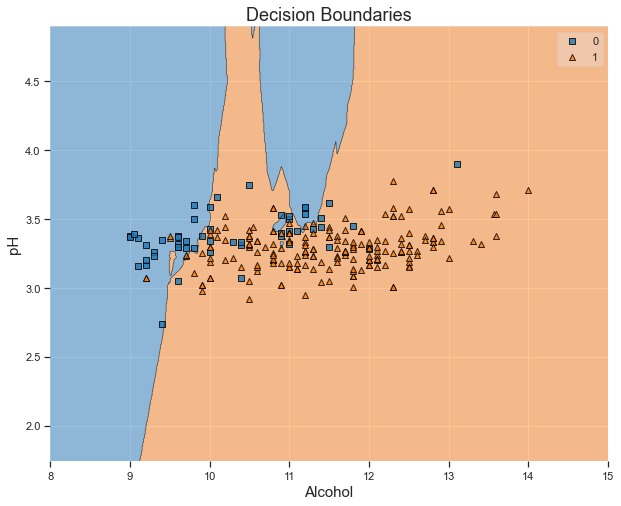

In [19]:
#Visualizing the decision boundary generated

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("pH", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[10 13]
 [ 1 60]] 



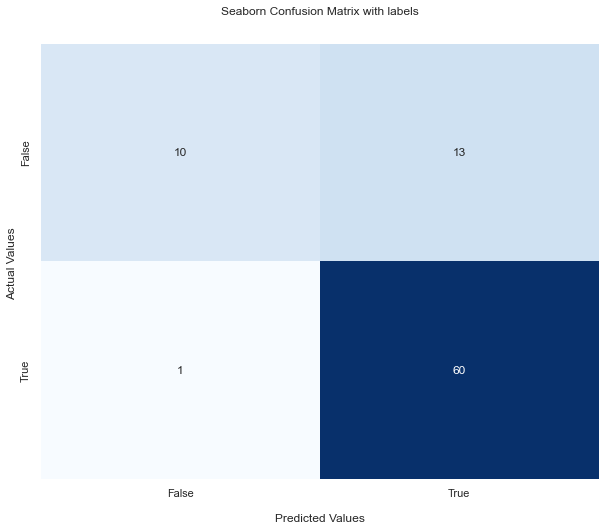

In [20]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

True Positives = 60
True Negatives = 10
False Positives = 13
Fales Negatives = 1

In [21]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.43      0.59        23
           1       0.82      0.98      0.90        61

    accuracy                           0.83        84
   macro avg       0.87      0.71      0.74        84
weighted avg       0.85      0.83      0.81        84



The accuracy of the model is quite high - 87%, thus it has worked well.